In [24]:
import pandas as pd
import seaborn as sns
import numpy as np, pandas as pd, matplotlib.pylab as plt, seaborn as sns, statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from numpy import *
from scipy import stats
from sklearn.metrics import silhouette_score
from scipy.stats import normaltest
from scipy.interpolate import *
from matplotlib.pyplot import *
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2
from xgboost import XGBRegressor
import seaborn as sns
from catboost import CatBoostRegressor
import numpy as np
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from matplotlib.widgets import Cursor 
from sklearn.linear_model import LogisticRegression
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from IPython import display
import numpy as np
from sklearn.cluster import AffinityPropagation
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_sample = pd.read_csv('sample_submission.csv')
df_location = pd.read_csv('LOCATION.csv', delimiter=";")
df_product = pd.read_csv('PRODUCT.csv', delimiter=";")

In [3]:
df_test.head(3)

,product_id,location_id,period_dt,id
0,22939,1162,2019-12-30,16
1,23162,1162,2019-12-30,7867
2,23163,1162,2019-12-16,8667


In [4]:
df_train.head(3)

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333103 entries, 0 to 2333102
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   period_dt          object 
 1   location_id        float64
 2   product_id         float64
 3   demand             float64
 4   PROMO1_FLAG        float64
 5   PROMO2_FLAG        float64
 6   PRICE_REGULAR      float64
 7   PRICE_AFTER_DISC   float64
 8   NUM_CONSULTANT     float64
 9   AUTORIZATION_FLAG  float64
 10  id                 int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 195.8+ MB


<AxesSubplot:>

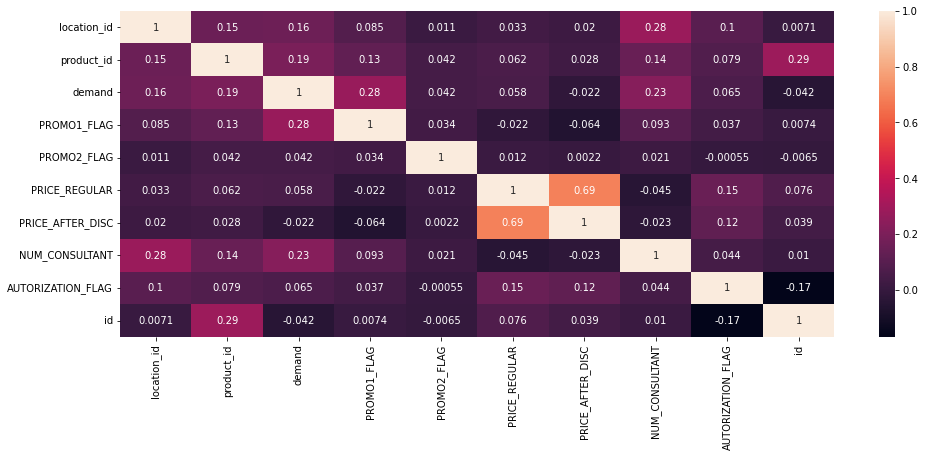

In [6]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_train.corr(),  annot=True)

# Data Preprocessing

In [7]:
df_train = pd.get_dummies(df_train, columns=['AUTORIZATION_FLAG', 'PROMO1_FLAG', 'PROMO2_FLAG'])
df_train['PRICE_REGULAR*PRICE_AFTER_DISC'] = df_train['PRICE_REGULAR']*df_train['PRICE_AFTER_DISC']
df_train['PRICE_REGULAR_squared'] = df_train['PRICE_REGULAR']**2
df_train['PRICE_AFTER_DISC_squared'] = df_train['PRICE_AFTER_DISC']**2
# df_train['PRICE_REGULAR_squared'] = df_train['PRICE_REGULAR']**(0.5)
# df_train['PRICE_AFTER_DISC_squared'] = df_train['PRICE_AFTER_DISC']**(0.5)
# df_train['Log_PRICE_REGULAR'] = np.log(df_train['PRICE_REGULAR'])
# df_train['Log_PRICE_AFTER_DISC'] = np.log(df_train['PRICE_AFTER_DISC'])

# df_train['PRICE_REGULAR_lag7'] = df_train['PRICE_REGULAR'].shift(7)
# df_train['PRICE_REGULAR_lag14'] = df_train['PRICE_REGULAR'].shift(14)
# df_train['PRICE_REGULAR_lag21'] = df_train['PRICE_REGULAR'].shift(21)
# df_train['PRICE_REGULAR_lag28'] = df_train['PRICE_REGULAR'].shift(28)

# df_train['PRICE_AFTER_DISC_lag7'] = df_train['PRICE_AFTER_DISC'].shift(7)
# df_train['PRICE_AFTER_DISC_lag14'] = df_train['PRICE_AFTER_DISC'].shift(14)
# df_train['PRICE_AFTER_DISC_lag21'] = df_train['PRICE_AFTER_DISC'].shift(21)
# df_train['PPRICE_AFTER_DISC_lag28'] = df_train['PRICE_AFTER_DISC'].shift(28)

# df_train['PRICE_REGULAR_mean7'] = df_train['PRICE_REGULAR'].rolling(window = 7).median()
# df_train['PRICE_REGULAR_mean14'] = df_train['PRICE_REGULAR'].rolling(window = 14).mean()
# df_train['PRICE_REGULAR_mean21'] = df_train['PRICE_REGULAR'].rolling(window = 21).mean()
# df_train['PRICE_REGULAR_mean28'] = df_train['PRICE_REGULAR'].rolling(window = 28).mean()

# df_train['PRICE_AFTER_DISC_mean7'] = df_train['PRICE_AFTER_DISC'].rolling(window = 7).median()
# df_train['PRICE_AFTER_DISC_mean14'] = df_train['PRICE_AFTER_DISC'].rolling(window = 14).mean()
# df_train['PRICE_AFTER_DISC_mean21'] = df_train['PRICE_AFTER_DISC'].rolling(window = 21).mean()
# df_train['PRICE_AFTER_DISC_mean28'] = df_train['PRICE_AFTER_DISC'].rolling(window = 28).mean()

In [8]:
scaler = MinMaxScaler()
scaler.fit(df_train[['PRICE_REGULAR']])
df_train['PRICE_REGULAR_scaled'] = scaler.transform(df_train[['PRICE_REGULAR']])
scaler.fit(df_train[['PRICE_AFTER_DISC']])
df_train['PRICE_AFTER_DISC_scaled'] = scaler.transform(df_train[['PRICE_AFTER_DISC']])

In [9]:
df_train.tail(7)

,period_dt,location_id,product_id,demand,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,id,AUTORIZATION_FLAG_0.0,AUTORIZATION_FLAG_1.0,...,PROMO1_FLAG_1.0,PROMO1_FLAG_2.0,PROMO1_FLAG_3.0,PROMO2_FLAG_0.0,PROMO2_FLAG_1.0,PRICE_REGULAR*PRICE_AFTER_DISC,PRICE_REGULAR_squared,PRICE_AFTER_DISC_squared,PRICE_REGULAR_scaled,PRICE_AFTER_DISC_scaled
2333096,2019-12-30,NaN,NaN,NaN,3949.0,1974.5,0.0,2337652,0,1,...,1,0,0,1,0,7797300.5,15594601.0,3898650.25,0.280125,0.178335
2333097,2019-12-30,NaN,NaN,NaN,3949.0,1974.5,0.0,2337653,0,1,...,1,0,0,1,0,7797300.5,15594601.0,3898650.25,0.280125,0.178335
2333098,2019-12-30,NaN,NaN,NaN,3949.0,2369.4,0.0,2337654,0,1,...,1,0,0,1,0,9356760.6,15594601.0,5614056.36,0.280125,0.214092
2333099,2019-12-30,NaN,NaN,NaN,NaN,NaN,0.0,2337655,1,0,...,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN
2333100,2019-12-30,NaN,NaN,NaN,NaN,NaN,0.0,2337656,1,0,...,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN
2333101,2019-12-30,NaN,NaN,NaN,NaN,NaN,0.0,2337657,1,0,...,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN
2333102,2019-12-30,NaN,NaN,NaN,2750.0,1650.0,0.0,2337658,0,1,...,1,0,0,1,0,4537500.0,7562500.0,2722500.00,0.186307,0.148953


In [10]:
df_sample.head(3)

,id,demand
0,16,1.0
1,7867,1.0
2,8667,1.0


In [11]:
df_location.head(3)

,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,279,183,183,20,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91


In [12]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STORE_LOCATION_RK                 1208 non-null   int64  
 1   STORE_LOCATION_LVL_RK4            1208 non-null   int64  
 2   STORE_LOCATION_LVL_RK3            1208 non-null   int64  
 3   STORE_LOCATION_LVL_RK2            1208 non-null   int64  
 4   STORE_LOCATION_LVL_RK1            1208 non-null   int64  
 5   STORE_OPEN_DTTM                   0 non-null      float64
 6   STORE_CLOSURE_DTTM                0 non-null      float64
 7   VALID_FROM_DTTM                   1208 non-null   object 
 8   VALID_TO_DTTM                     1208 non-null   object 
 9   PROCESSED_DTTM                    1208 non-null   object 
 10  STORE_LOCATION_ADK_hashing        1208 non-null   object 
 11  STORE_LOCATION_ID_hashing         1208 non-null   object 
 12  STORE_

In [13]:
df_product.head(3)

,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,11316,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
1,11317,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2,11318,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977


In [14]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171608 entries, 0 to 171607
Data columns (total 67 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCT_RK                 171608 non-null  int64  
 1   PRODUCT_LVL_RK6            171608 non-null  int64  
 2   PRODUCT_LVL_RK5            171608 non-null  int64  
 3   PRODUCT_LVL_RK4            171608 non-null  int64  
 4   PRODUCT_LVL_RK3            171608 non-null  int64  
 5   PRODUCT_LVL_RK2            171608 non-null  int64  
 6   PRODUCT_LVL_RK1            171608 non-null  int64  
 7   SALES_INTRODUCTION_DT      0 non-null       float64
 8   SALES_DISCONTINUED_DT      0 non-null       float64
 9   VALID_FROM_DTTM            171608 non-null  object 
 10  VALID_TO_DTTM              171608 non-null  object 
 11  PROCESSED_DTTM             171608 non-null  object 
 12  PRODUCT_ADK_hashing        171608 non-null  object 
 13  PRODUCT_ID_hashing         17

In [15]:
df_train.period_dt = pd.to_datetime(df_train.period_dt)

In [16]:
df_train['period_dt_year'] = df_train['period_dt'].dt.year
df_train['period_dt_month'] = df_train['period_dt'].dt.month
df_train['period_dt_day'] = df_train['period_dt'].dt.day

In [17]:
# df_train = df_train[df_train['period_dt_year'] > 2017]

In [18]:
df_train = df_train.drop(columns = ['period_dt', 'location_id', 'product_id'])

In [19]:
df_train

,demand,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,id,AUTORIZATION_FLAG_0.0,AUTORIZATION_FLAG_1.0,PROMO1_FLAG_0.0,PROMO1_FLAG_1.0,PROMO1_FLAG_2.0,...,PROMO2_FLAG_0.0,PROMO2_FLAG_1.0,PRICE_REGULAR*PRICE_AFTER_DISC,PRICE_REGULAR_squared,PRICE_AFTER_DISC_squared,PRICE_REGULAR_scaled,PRICE_AFTER_DISC_scaled,period_dt_year,period_dt_month,period_dt_day
0,NaN,3649.0,2736.75,0.0,1,1,0,1,0,0,...,1,0,9986400.75,13315201.0,7.489801e+06,0.256651,0.247354,2019,12,30
1,NaN,3649.0,2371.85,0.0,3,0,1,1,0,0,...,1,0,8654880.65,13315201.0,5.625672e+06,0.256651,0.214314,2019,12,30
2,NaN,3649.0,2736.75,0.0,5,0,1,1,0,0,...,1,0,9986400.75,13315201.0,7.489801e+06,0.256651,0.247354,2019,12,30
3,NaN,3649.0,2736.75,0.0,7,1,0,1,0,0,...,1,0,9986400.75,13315201.0,7.489801e+06,0.256651,0.247354,2019,12,30
4,NaN,3649.0,3101.65,0.0,9,1,0,1,0,0,...,1,0,11317920.85,13315201.0,9.620233e+06,0.256651,0.280395,2019,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333098,NaN,3949.0,2369.40,0.0,2337654,0,1,0,1,0,...,1,0,9356760.60,15594601.0,5.614056e+06,0.280125,0.214092,2019,12,30
2333099,NaN,NaN,NaN,0.0,2337655,1,0,0,1,0,...,1,0,NaN,NaN,NaN,NaN,NaN,2019,12,30
2333100,NaN,NaN,NaN,0.0,2337656,1,0,0,1,0,...,1,0,NaN,NaN,NaN,NaN,NaN,2019,12,30
2333101,NaN,NaN,NaN,0.0,2337657,1,0,0,1,0,...,1,0,NaN,NaN,NaN,NaN,NaN,2019,12,30


In [20]:
test = df_train[df_train['demand'].isnull()]
test = test.drop(columns = ['demand'])

In [21]:
df_train.dropna(inplace=True)
df_train

,demand,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,id,AUTORIZATION_FLAG_0.0,AUTORIZATION_FLAG_1.0,PROMO1_FLAG_0.0,PROMO1_FLAG_1.0,PROMO1_FLAG_2.0,...,PROMO2_FLAG_0.0,PROMO2_FLAG_1.0,PRICE_REGULAR*PRICE_AFTER_DISC,PRICE_REGULAR_squared,PRICE_AFTER_DISC_squared,PRICE_REGULAR_scaled,PRICE_AFTER_DISC_scaled,period_dt_year,period_dt_month,period_dt_day
15,0.035398,3649.0,3101.65,0.0,25,0,1,0,1,0,...,1,0,11317920.85,13315201.0,9.620233e+06,0.256651,0.280395,2019,12,2
16,1.000000,2380.0,2380.00,0.0,26,0,1,0,1,0,...,1,0,5664400.00,5664400.0,5.664400e+06,0.157355,0.215052,2017,8,28
17,2.000000,3549.0,2306.85,0.0,27,0,1,1,0,0,...,1,0,8187010.65,12595401.0,5.321557e+06,0.248826,0.208428,2018,3,5
18,1.013850,3549.0,2306.85,0.0,28,0,1,1,0,0,...,1,0,8187010.65,12595401.0,5.321557e+06,0.248826,0.208428,2018,3,19
19,0.019391,3549.0,2306.85,0.0,29,0,1,1,0,0,...,1,0,8187010.65,12595401.0,5.321557e+06,0.248826,0.208428,2018,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284114,1.000000,4449.0,2224.50,0.0,288670,0,1,0,1,0,...,1,0,9896800.50,19793601.0,4.948400e+06,0.319249,0.200972,2019,11,11
284115,1.000000,3999.0,1999.50,0.0,288671,0,1,0,1,0,...,1,0,7996000.50,15992001.0,3.998000e+06,0.284038,0.180599,2019,11,11
284116,2.000000,9799.0,4899.50,0.0,288672,0,1,0,1,0,...,1,0,48010200.50,96020401.0,2.400510e+07,0.737872,0.443184,2019,11,18
284117,1.000000,4299.0,2149.50,0.0,288673,0,1,0,1,0,...,1,0,9240700.50,18481401.0,4.620350e+06,0.307512,0.194181,2019,11,25


In [22]:
y = df_train[['demand']]
df_train = df_train.drop(columns = ['demand'])
x_train, x_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=42)

# Models

In [25]:
models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor(),
         XGBRegressor()]

In [26]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=None)
    pred = model_selection.cross_val_score(model, df_train, y, cv=kfold, scoring='neg_mean_absolute_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [27]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.42494998934457956
Model: Ridge()
CV score: 0.42495028857064643
Model: HuberRegressor()
CV score: 0.448405221587388
Model: ElasticNetCV()
CV score: 0.4953598076093412
Model: DecisionTreeRegressor()
CV score: 0.5351980187250284
Model: RandomForestRegressor()
CV score: 0.4484449516916458
Model: ExtraTreesRegressor()
CV score: 0.4622347868444156
Model: GradientBoostingRegressor()
CV score: 0.35699238864281235
Model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=N

In [78]:
reg = CatBoostRegressor(iterations=1000, depth=16, learning_rate=0.1, loss_function='MAE')
reg.fit(df_train,y)

0:	learn: 0.3632050	total: 1.07s	remaining: 17m 50s
1:	learn: 0.3512091	total: 1.94s	remaining: 16m 7s
2:	learn: 0.3411064	total: 2.81s	remaining: 15m 33s
3:	learn: 0.3327231	total: 3.65s	remaining: 15m 8s
4:	learn: 0.3252960	total: 4.5s	remaining: 14m 56s
5:	learn: 0.3188151	total: 5.33s	remaining: 14m 43s
6:	learn: 0.3133712	total: 6.17s	remaining: 14m 34s
7:	learn: 0.3087219	total: 7s	remaining: 14m 28s
8:	learn: 0.3046657	total: 8.02s	remaining: 14m 42s
9:	learn: 0.3010771	total: 8.92s	remaining: 14m 42s
10:	learn: 0.2979347	total: 9.77s	remaining: 14m 38s
11:	learn: 0.2945810	total: 10.6s	remaining: 14m 36s
12:	learn: 0.2919009	total: 11.5s	remaining: 14m 35s
13:	learn: 0.2897187	total: 12.3s	remaining: 14m 29s
14:	learn: 0.2874647	total: 13.2s	remaining: 14m 27s
15:	learn: 0.2853395	total: 14.1s	remaining: 14m 25s
16:	learn: 0.2836673	total: 15s	remaining: 14m 25s
17:	learn: 0.2820173	total: 15.8s	remaining: 14m 23s
18:	learn: 0.2807340	total: 16.7s	remaining: 14m 21s
19:	learn: 

In [255]:
reg = LinearRegression().fit(df_train,y)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

0.39543009195758627

In [253]:
reg = RandomForestRegressor(n_estimators = 300, max_depth=96, random_state=0).fit(df_train,y)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

0.08293839397494387

In [570]:
#FINAL MODEL
params = {'n_estimators': 500, #500
          'max_depth': 6,#6
          'learning_rate': 0.01,
          'criterion':'mse',
          'min_samples_split': 10,#10
          'loss': 'squared_error'}


reg = GradientBoostingRegressor(**params).fit(df_train,y)
#reg_res = reg.predict(x_test)
#mean_absolute_error(y_test, reg_res)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\skl

In [246]:
reg = XGBRegressor().fit(x_train,y_train)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.2909069359907206

In [35]:
reg = XGBRegressor(n_estimators = 2000, max_depth = 5, learning_rate = 0.1, min_child_weight = 2).fit(x_train,y_train)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.26422999786964896

In [36]:
reg = XGBRegressor(n_estimators = 3000, max_depth = 5, learning_rate = 0.1, min_child_weight = 2).fit(x_train,y_train)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.2571160567903834

In [ ]:
reg = XGBRegressor(n_estimators = 3000, max_depth = 10, learning_rate = 0.1, min_child_weight = 2).fit(x_train,y_train)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

In [381]:
reg = XGBRegressor(n_estimators = 3000, max_depth = 10, learning_rate = 0.1, min_child_weight = 2).fit(df_train,y)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [440]:
reg = XGBRegressor(max_depth=8,
n_estimators=1000,
min_child_weight=300,
colsample_bytree=0.8,
subsample=0.8,
eta=0.3,
seed=42).fit(df_train,y)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [ ]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=10,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(df_train,y)

random_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [203]:
reg = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3, n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1).fit(x_train,y_train)
reg_res = reg.predict(x_test)
mean_absolute_error(y_test, reg_res)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.31445957278917186

In [571]:
id = df_test['id'].tolist()

In [572]:
id

[16,
 7867,
 8667,
 14835,
 14959,
 24820,
 35688,
 41293,
 41644,
 41646,
 41651,
 41689,
 43602,
 44300,
 45713,
 45741,
 55956,
 62047,
 73355,
 90712,
 93429,
 93436,
 97649,
 99244,
 100874,
 100875,
 100878,
 101054,
 101544,
 101760,
 101993,
 108370,
 108489,
 108539,
 109453,
 111539,
 114549,
 114552,
 114621,
 114727,
 114917,
 114923,
 114932,
 114935,
 114936,
 114940,
 115231,
 115286,
 124189,
 124466,
 124470,
 124686,
 124864,
 124876,
 125829,
 126221,
 126224,
 126535,
 126786,
 128701,
 128703,
 129392,
 129393,
 129968,
 130337,
 131339,
 131345,
 131723,
 131731,
 132043,
 135015,
 135159,
 135166,
 135169,
 136311,
 137556,
 140320,
 140648,
 140649,
 148478,
 148518,
 148813,
 150929,
 151819,
 152361,
 152513,
 154924,
 155098,
 156907,
 156991,
 156993,
 156994,
 156996,
 156998,
 158201,
 158206,
 158247,
 158447,
 160156,
 160555,
 160753,
 162072,
 162351,
 163362,
 163695,
 164054,
 164060,
 164161,
 164384,
 164394,
 164476,
 164484,
 164487,
 164503,
 16

In [573]:
test_sub = test.loc[test['id'].isin(id)]

In [575]:
# for col in test_sub.columns:
#     test_sub[col] = test_sub[col].fillna(np.mean(test_sub[col]))
test_sub = test_sub.fillna(0)

In [576]:
predictions = reg.predict(test_sub)

In [577]:
predictions

array([0.44338872, 0.38857523, 0.18537321, 0.2559591 , 0.38471383,
       0.21106122, 0.86120448, 1.06898   , 1.01319502, 0.68371784,
       0.97422884, 0.970045  , 0.91817876, 0.61140604, 0.90082327,
       0.81599177, 0.89652306, 0.54306498, 0.87661253, 1.27584636,
       0.93046981, 0.87307143, 0.80790319, 0.55642484, 0.90868515,
       0.58024024, 0.81458551, 0.81458551, 0.93264662, 0.60140926,
       0.53611935, 0.39683461, 0.46443422, 0.59105604, 0.91888984,
       0.26573883, 0.56903487, 0.80447195, 0.56903487, 0.53826167,
       0.86187033, 0.80877514, 0.80877514, 0.8454764 , 0.90287478,
       0.80877514, 0.57755327, 0.93258402, 0.33374516, 0.27204469,
       0.33374516, 0.64506772, 0.25257667, 0.62306711, 0.58382107,
       0.25292613, 0.82299521, 0.25292613, 0.90166368, 0.91360147,
       0.91360147, 0.98174892, 0.97381583, 0.58438464, 0.80962606,
       0.80962606, 0.58438464, 0.90375457, 0.58548444, 0.96453521,
       0.6139989 , 0.90090597, 1.0944131 , 0.98618108, 0.93257

In [578]:
df_sample['demand'] = predictions

In [579]:
df_sample
df_sample.to_csv('submssion25.csv', index=False)

In [580]:
df_sample

,id,demand
0,16,0.443389
1,7867,0.388575
2,8667,0.185373
3,14835,0.255959
4,14959,0.384714
...,...,...
588,203996,1.241036
589,203997,0.586232
590,204035,0.488523
591,204037,0.488523
